PROBLEM DEFINITION:
Before we delve deeper into the dataset, it is important to define the problem, the objectives of the problem and the probable solution(s) which we sought to achieve through this project.

The problem is by a Portuguese bank which intends to predict whether a customer (which it is yet to contact) will subscribe to its term deposits. If this information is known beforehand, the target audience (Population from the 4P's of marketing) can be narrowed or optimized so as to achieve better conversion of the product/service offered through the campaign.

Before we move further, we will define 'term deposit'. Term deposit is nothing but an amount deposited by a customer in a bank/financial institution which in return would provide interest on the amount deposited. These are usually short term deposits, however they are for fixed term and thus provide higher interest rates as compared to traditional liquid saving accounts where customers can withdraw amount at any instance.

More information on this topic can be viewed at https://www.investopedia.com/terms/t/termdeposit.asp 

Summarizing, this project deals with predicting whether a customer will susbscribe to the term deposit offered by the bank based on characteristics of customer which are yet to be seen. At the outset, the problem can be conceptualized as a Binary Classification Problem with the output - A Yes or No decision to the subscription of the offering. 

Importing the necessary libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve

THE DATASET

In [5]:
df = pd.read_csv("bank-additional-full.csv", delimiter = ";")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


DATA DICTIONARY:
    
1 - Age: Age of the customer                     
2 - Job: Type of job of the customer (eg: Services, administration, retired, student etc)                       
3 - Marital: Whether the customer is single/maried/divorced                     
4 - Education: Level of education of the customer                  
5 - Default: Whether the customer has credit in default                          
6 - Housing: Whether the customer has an active housing loan                          
7 - Loan: Whether the customer has an active personal/other loan                              
8 - Contact: Type of contact of the customer available with the bank                     
9 - month: Month when the customer was last contacted                        
10 - day_of_week: Day of the week when the customer was last contacted                              
11 - duration: last contact duration, in seconds (numeric). Note: Duration won't be known before and cannot be considered while training the model.                                                                        
12 - campaign: No of times the client has been contacted for this campaign.                    
13 - pdays: No of days passed after the client was last contacted                     
14 - previous: No of times that the client has been contacted before this campaign               
15 - poutcome: Outcome of the previous marketing campaign                     
16 - Emp.var.rate: employment variation rate - quarterly indicator          
17 - Cons.price.idx: consumer price index - monthly indicator                  
18 - Cons.conf.idx: consumer confidence index - monthly indicator                         
19 - Euribor3m: euribor 3 month rate - daily indicator                 
20 - Nr.employed: number of employees - quarterly indicator                     

Interpreting important characteristics of data

In [7]:
df.shape

(41188, 21)

As evident, the data has 41188 rows and 21 columns.
Of the 21 fields, y denotes the customer decision, where the rest 20 are potential characteristics governing that decision...or 'features' in ML Lingo.

Exploring the features

In [8]:
for column in df.columns:
    print(column)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


In [9]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
for column in df.columns:
    no_unique_values = df[column].nunique()
    
    if no_unique_values <= 5:
        unique_values = df[column].unique()
        print(f"{column}: {no_unique_values}, {unique_values}") 
    else:
        print(f"{column}: {no_unique_values}")

age: 78
job: 12
marital: 4, ['married' 'single' 'divorced' 'unknown']
education: 8
default: 3, ['no' 'unknown' 'yes']
housing: 3, ['no' 'yes' 'unknown']
loan: 3, ['no' 'yes' 'unknown']
contact: 2, ['telephone' 'cellular']
month: 10
day_of_week: 5, ['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544
campaign: 42
pdays: 27
previous: 8
poutcome: 3, ['nonexistent' 'failure' 'success']
emp.var.rate: 10
cons.price.idx: 26
cons.conf.idx: 26
euribor3m: 316
nr.employed: 11
y: 2, ['no' 'yes']


Checking for null values

In [11]:
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

From the initial analysis, we see that there are no null values. However there may be unknown values masked as some string which we will explore in the EDA

EXPLORATORY DATA ANALYSIS

From the data dictionary and the unique values of each field, we get a fair idea about the categorical and numerical features. Lets separate the categorical and numerical features so as to proceed with data exploration

1 - Age: Continuous/Numerical                     
2 - Job: Categorical(Student/Service/Retired etc)                      
3 - Marital: Categorical (single/married/divorced etc)               
4 - Education: Categorical                  
5 - Default: Categorcial (Binary - Yes/No)                      
6 - Housing: Categorical (Binary - Yes/No)                         
7 - Loan: Categorical (Binary - Yes/No)                              
8 - Contact: Categorical                     
9 - month: Date                       
10 - day_of_week: Date                            
11 - duration: Continuous/Numerical.                                                                        
12 - campaign: Numerical.                    
13 - pdays: Numerical                   
14 - previous: Numerical(Can be treated as categorical as it has only 8 unique values)              
15 - poutcome: Categorical                     
16 - Emp.var.rate: Numerical             
17 - Cons.price.idx: Numerical                     
18 - Cons.conf.idx: Numerical                          
19 - Euribor3m: Numerical                            
20 - Nr.employed: Numerical     

In [12]:
categorical_features = [ "job", "marital", "education", "default", "housing", "loan", "contact", "previous", "poutcome"]
numerical_features = ["age", "duration", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

Data Visualization of Categorical Variables

Plotting Count Plots for Categorical Data

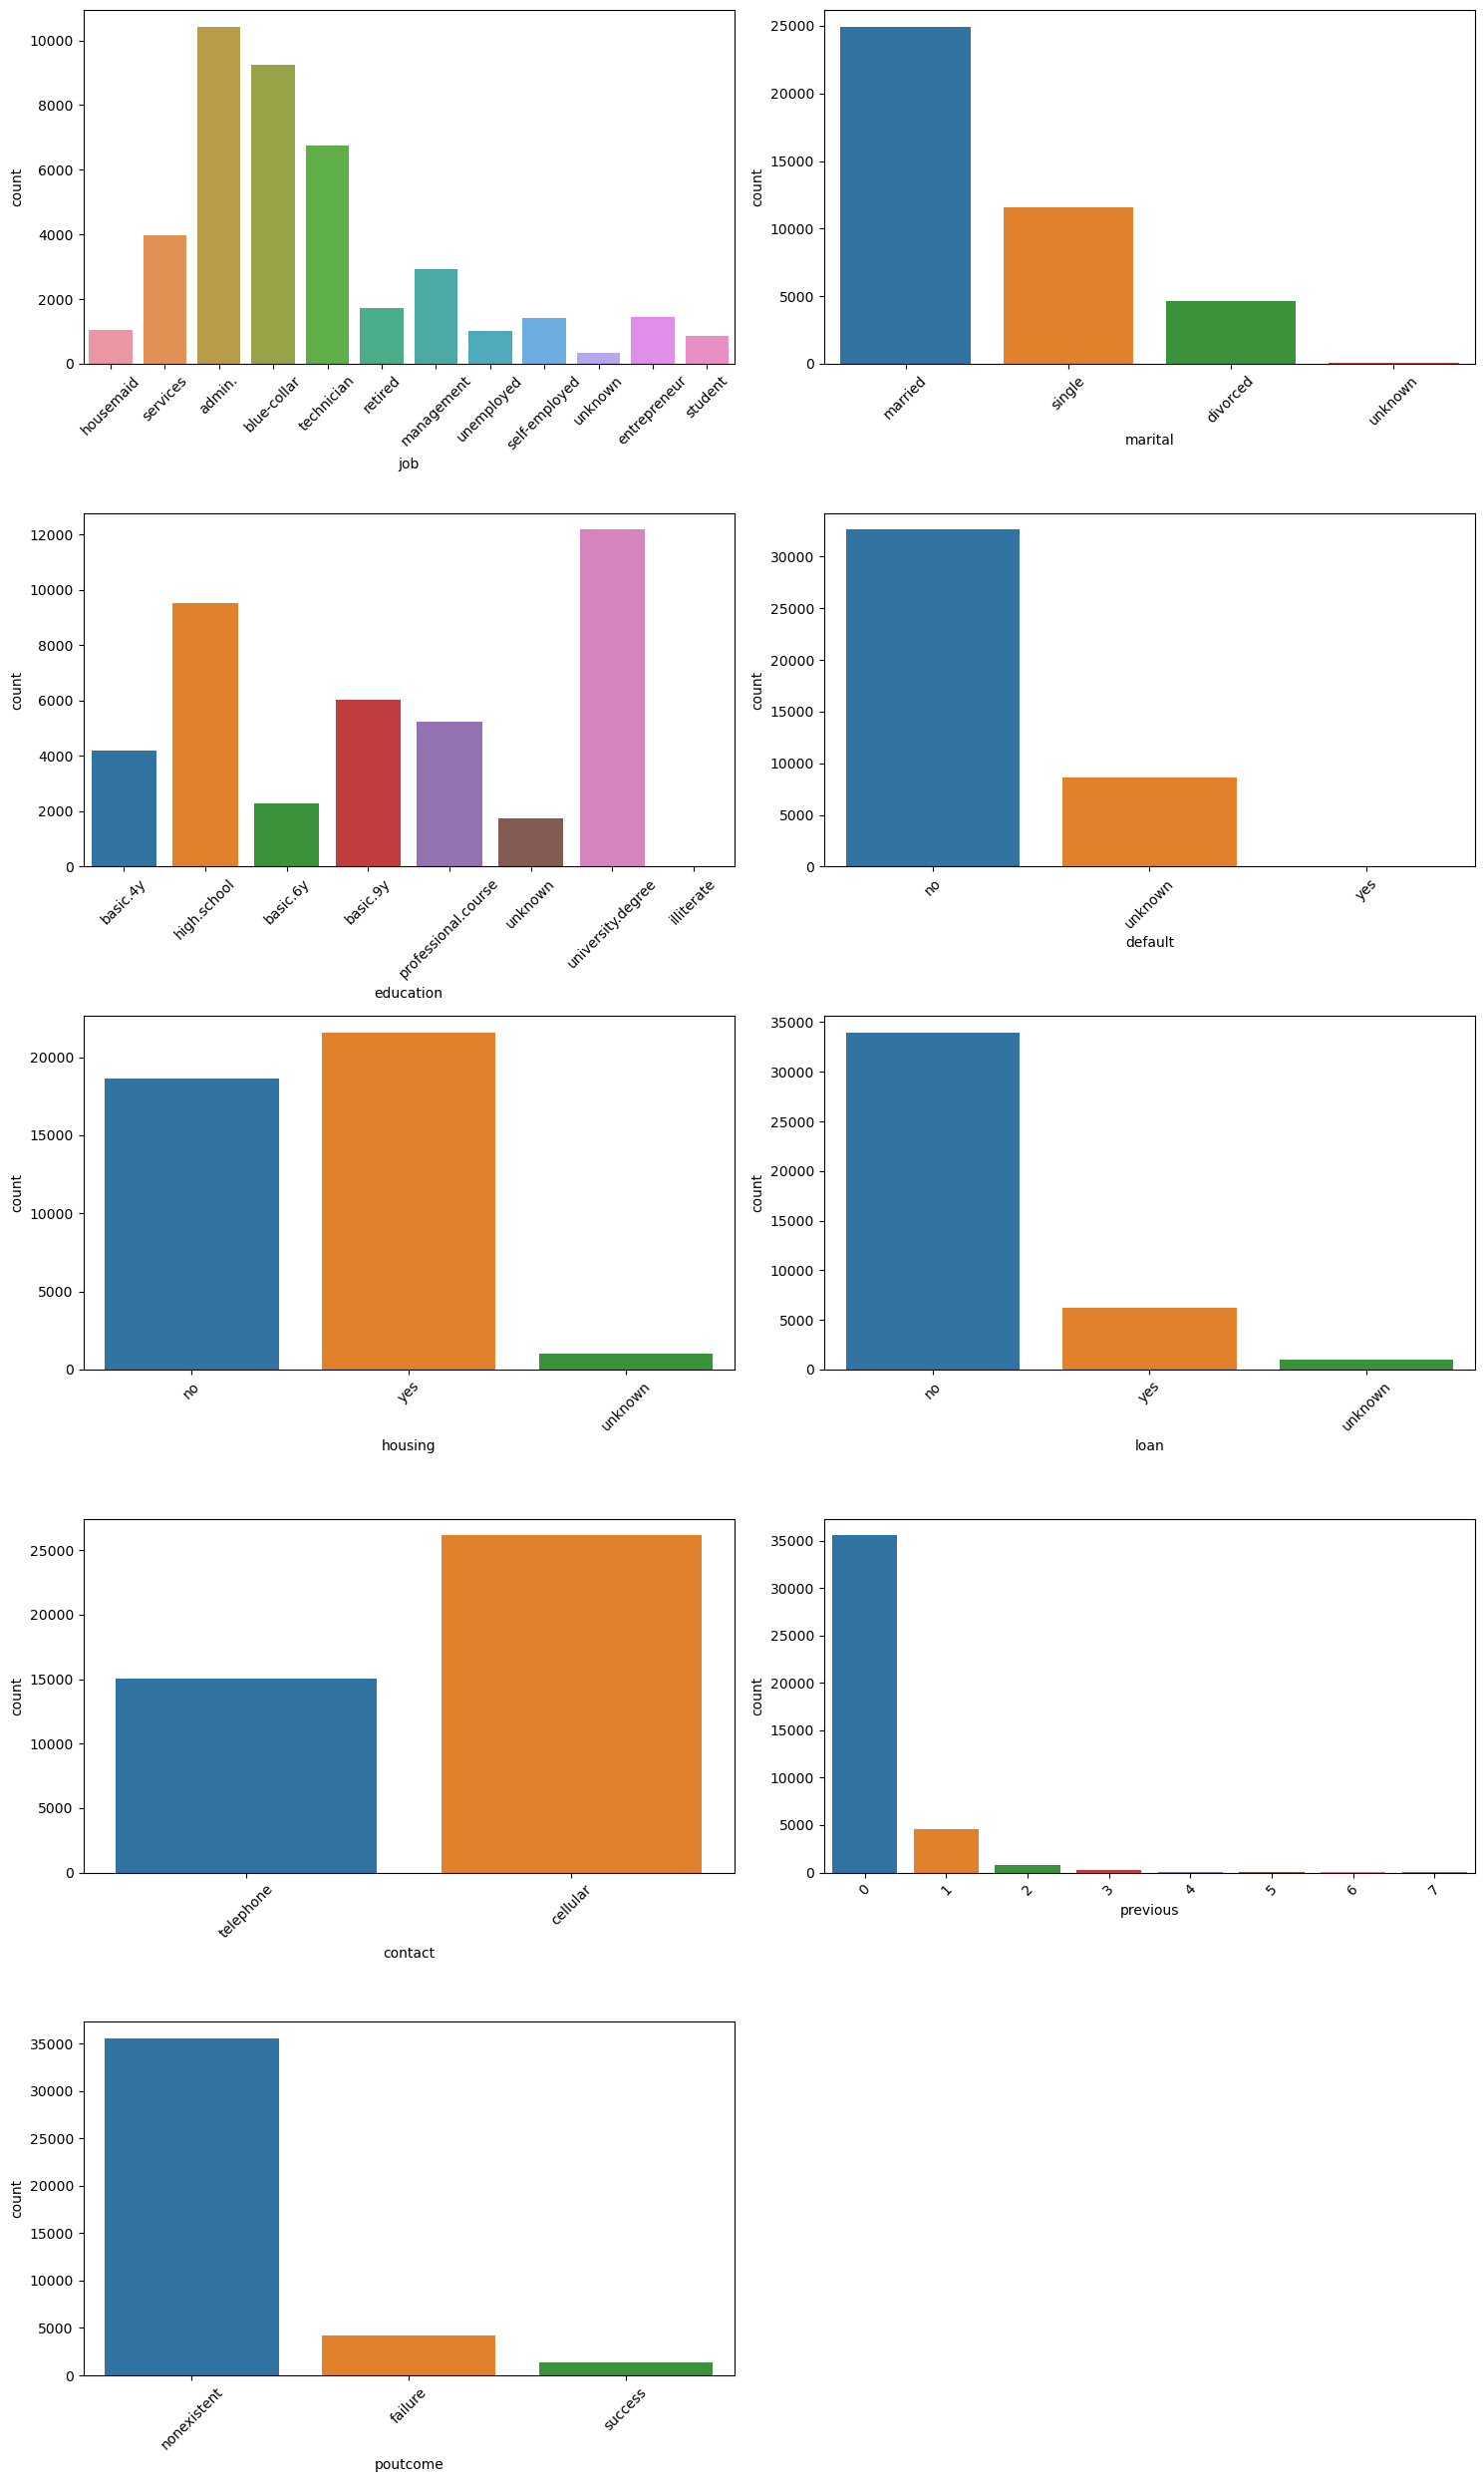

In [13]:
cat_features = len(categorical_features)
cat_cols = 2
cat_rows = math.ceil(cat_features / cat_cols)
# Create a grid of subplots using Seaborn
fig, axes = plt.subplots(cat_rows, cat_cols, figsize=(15, 5*cat_rows))
for i, cat_feature in enumerate(categorical_features):
    row, col = divmod(i, cat_cols)
    sns.countplot(data=df, x= cat_feature, ax=axes[row, col])
    axes[row, col].tick_params(axis='x', labelrotation=45)
    
for i in range(len(categorical_features), cat_rows * cat_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

We see that most of the categorical data is expectedly skewed. However, it is important to note that there are instances where the data is not known and is marked as unknown. Eg: mariage status, education status, default

Let us check how the susbscription decision varies along these categorical variables.

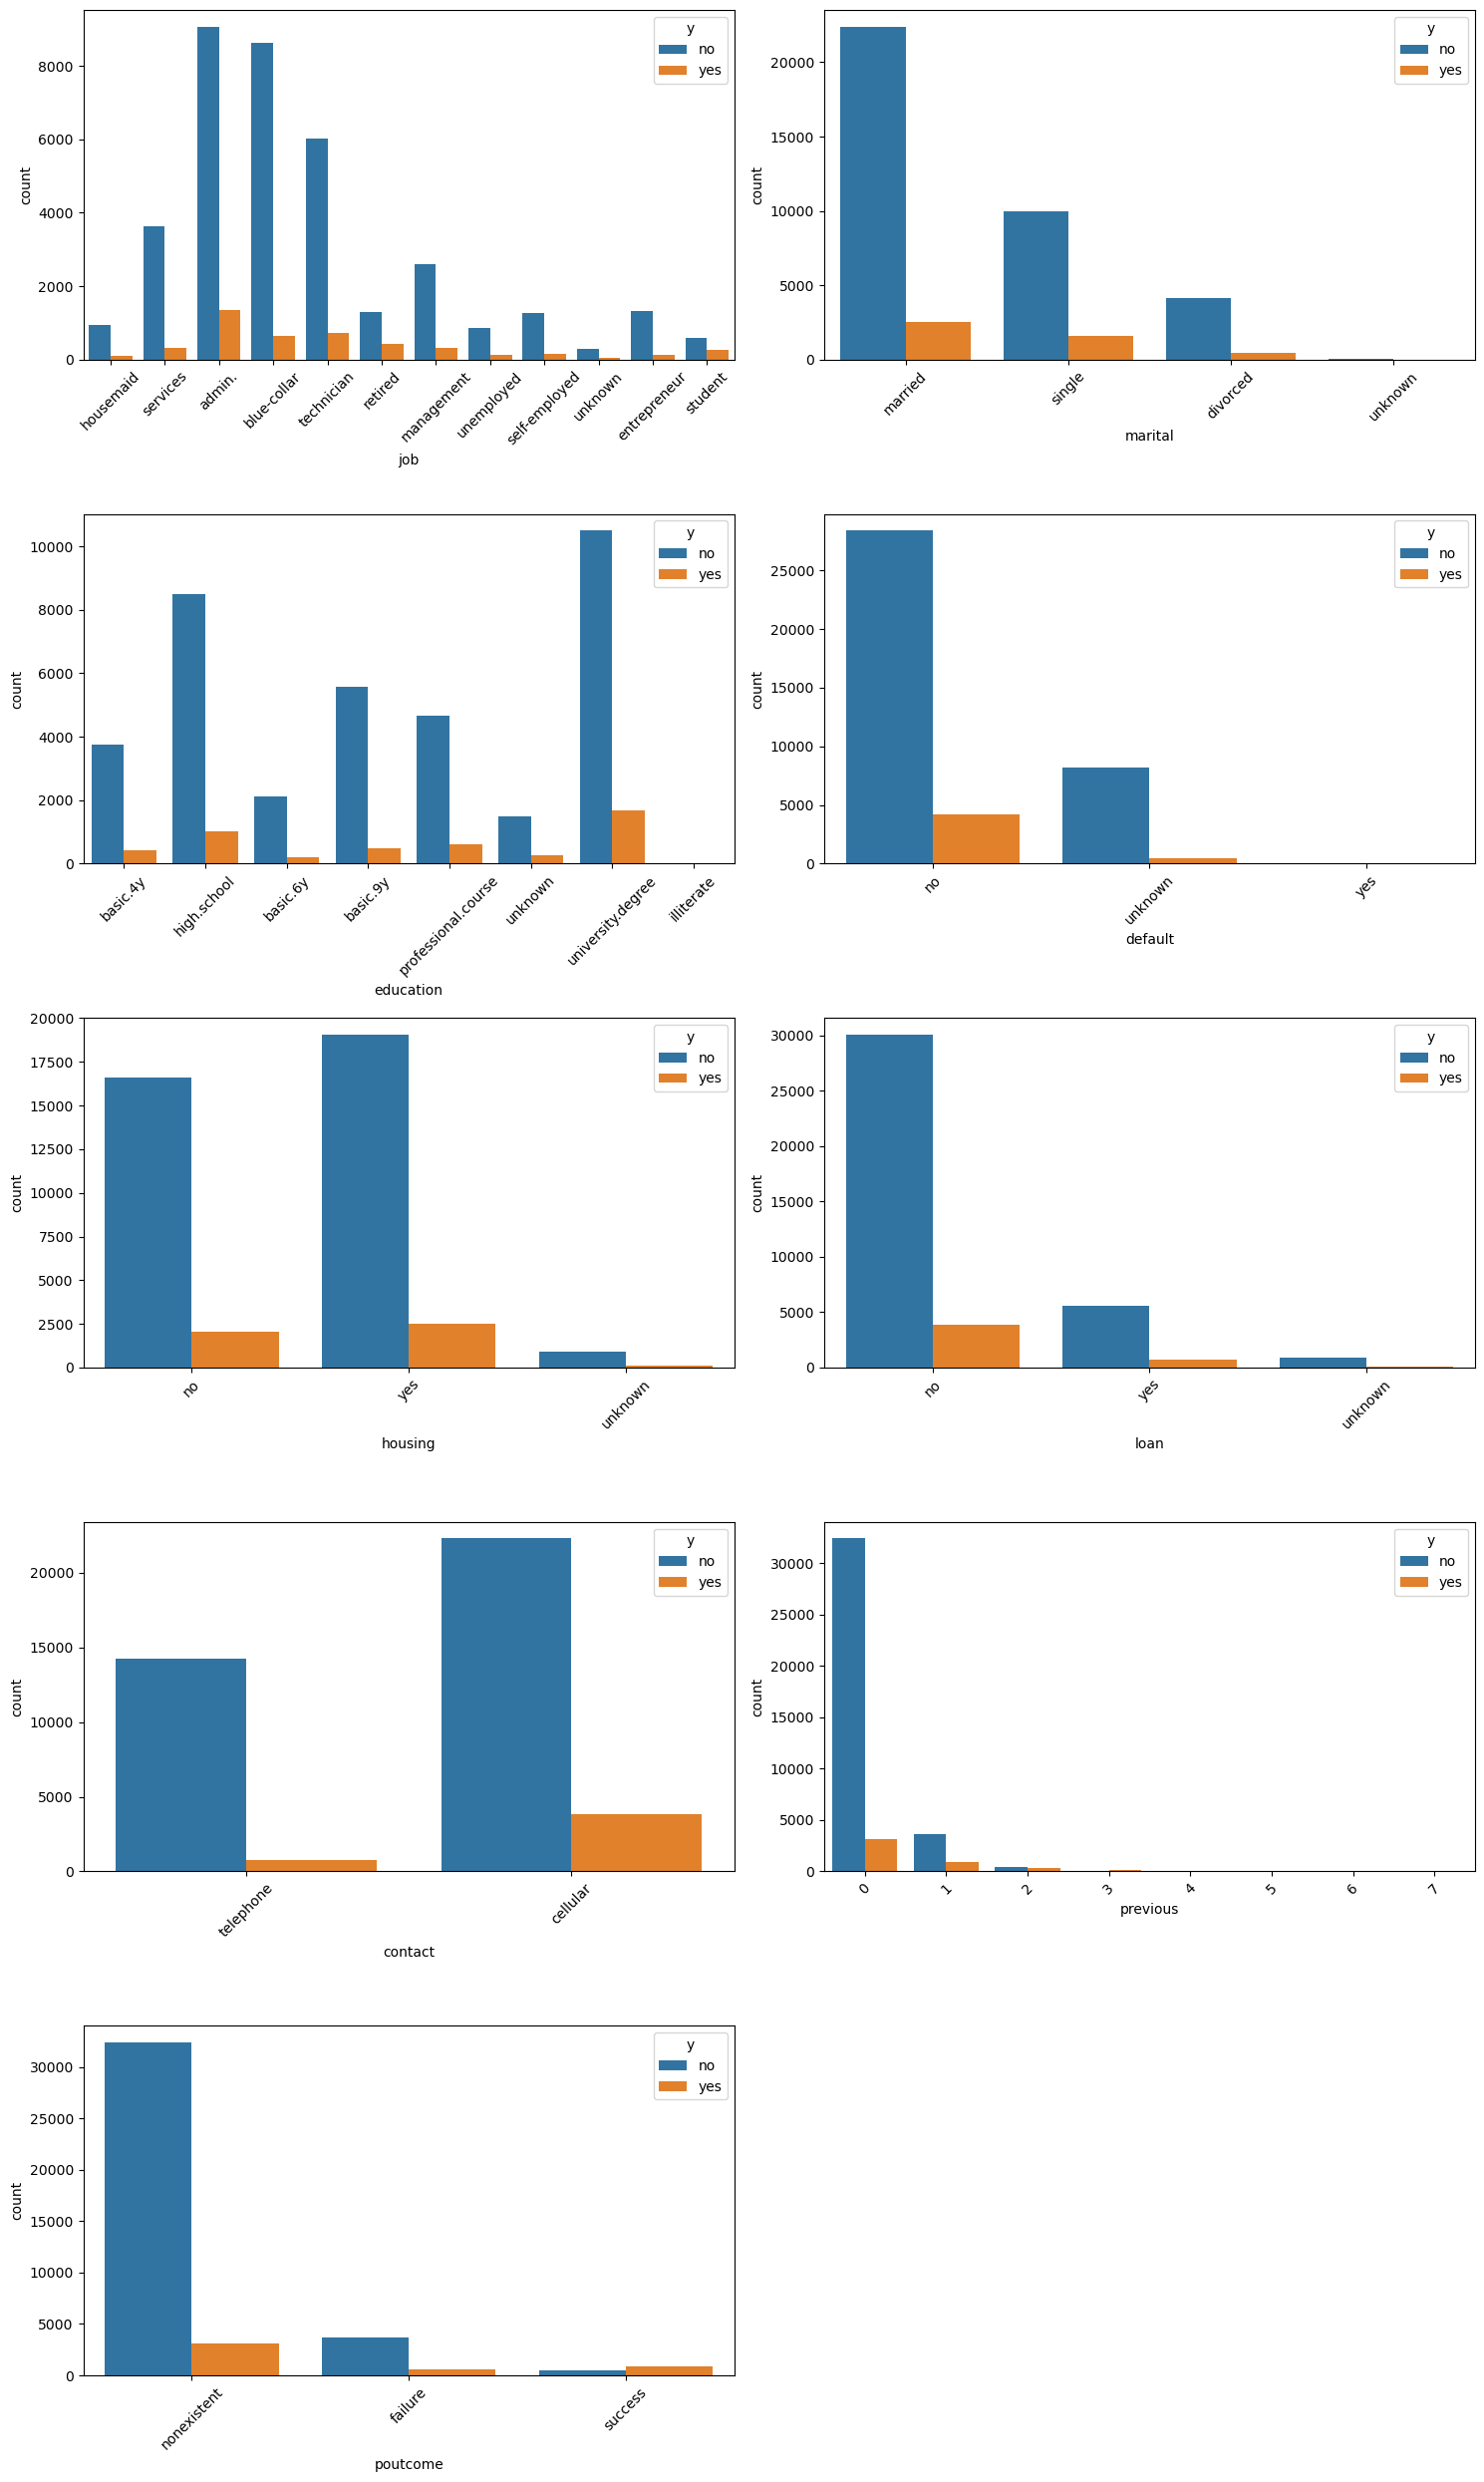

In [14]:
cat_features = len(categorical_features)
cat_cols = 2
cat_rows = math.ceil(cat_features / cat_cols)
# Create a grid of subplots using Seaborn
fig, axes = plt.subplots(cat_rows, cat_cols, figsize=(15, 5*cat_rows))
for i, cat_feature in enumerate(categorical_features):
    row, col = divmod(i, cat_cols)
    sns.countplot(data=df, x= cat_feature, ax=axes[row, col], hue= "y")
    axes[row, col].tick_params(axis='x', labelrotation=45)
    
for i in range(len(categorical_features), cat_rows * cat_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

Insights: There are some insights to be drawn from the above visualizations.

1. Customers that are either students or retired professionals are more likely to sign up for the term deposits as compared to other professions.
2. Customers contacted on cellphone are more likely to commit to the subscription as compared to those on telephone
3. Customers who have signed up for previous campaigns are more likely than not to sign up for the campaign and therefore should be definitely approached

Analyzing the effect of the datetime features on the decision

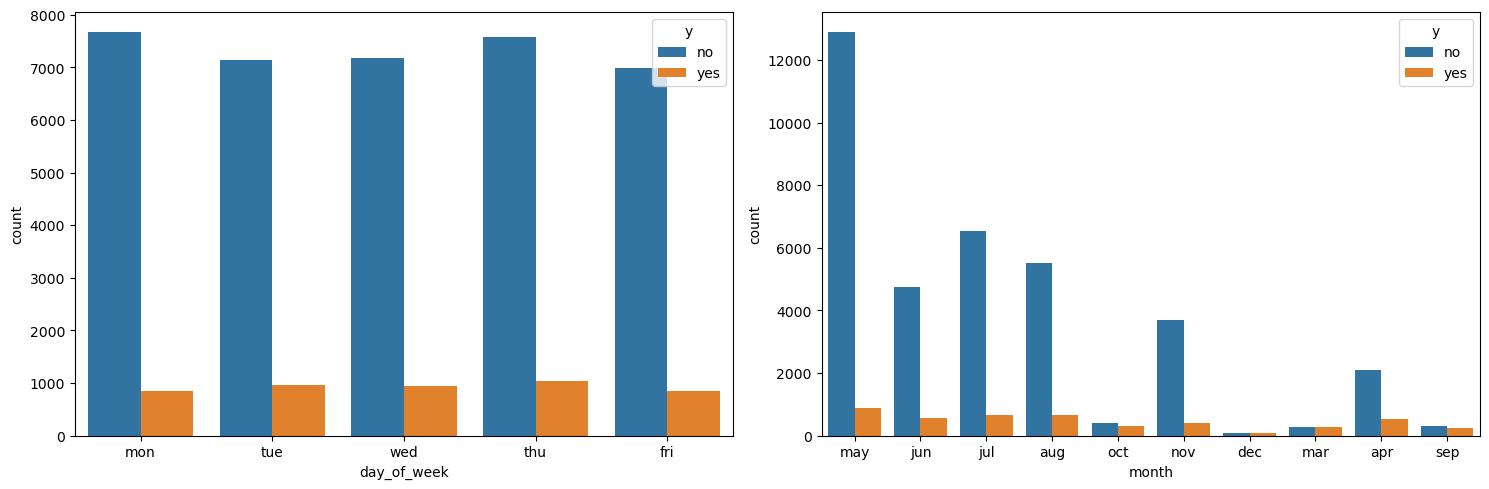

In [15]:
features = ["day_of_week", "month"]
cat_features = len(features)
cat_cols = 2
cat_rows = math.ceil(cat_features / cat_cols)
# Create a grid of subplots using Seaborn
fig, axes = plt.subplots(cat_rows, cat_cols, figsize=(15, 5*cat_rows))
for i, cat_feature in enumerate(features):
    row, col = divmod(i, cat_cols)
    sns.countplot(data=df, x= cat_feature,hue = "y", ax=axes[col])
    
    
plt.tight_layout()
plt.show()

Insight: No certain comment can be made on effect of day of the week on customer decision. In regards to the month feature, it seems to appear that campaign carried out in some months like March, April, Sept, Oct and Dec perform better than those carried out in other months. However, the sample space is too small to establish this conclusion.

 Numerical features

In [16]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


Description of numerical data:
Age: The mean age in the dataset is 40 with std dev of 10.Thus most of the customers contacted are having ages 30-50.                                            
Duration: The duration of the calls is widely dispersed ranging from 0 to 4918 seconds. It doesn't make sense to keep data where the customer didn't converse, therefore we will drop the rows where duration is 0 secs.                                   
Previous: We can see more than 75% of the customers contacted had never been contacted before.                               
pdays: We see that max value here is 999 which is not the actual no of days, 999 is an arbitrary value for customers who have never been contacted. This also reflects in the mean and the distribution as more than 75% has value 999 which is in conformity with the customers not been contacted.                  

In [17]:
#Dropping rows where duration is zero seconds
zero_duration_rows = df[df.duration == 0].index
df = df.drop(zero_duration_rows, axis = 0)

In [18]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41184.00,41184.00,41184.00,41184.00,41184.00,41184.00,41184.00,41184.00,41184.00,41184.00
mean,40.02,258.31,2.57,962.47,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.92,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,1.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


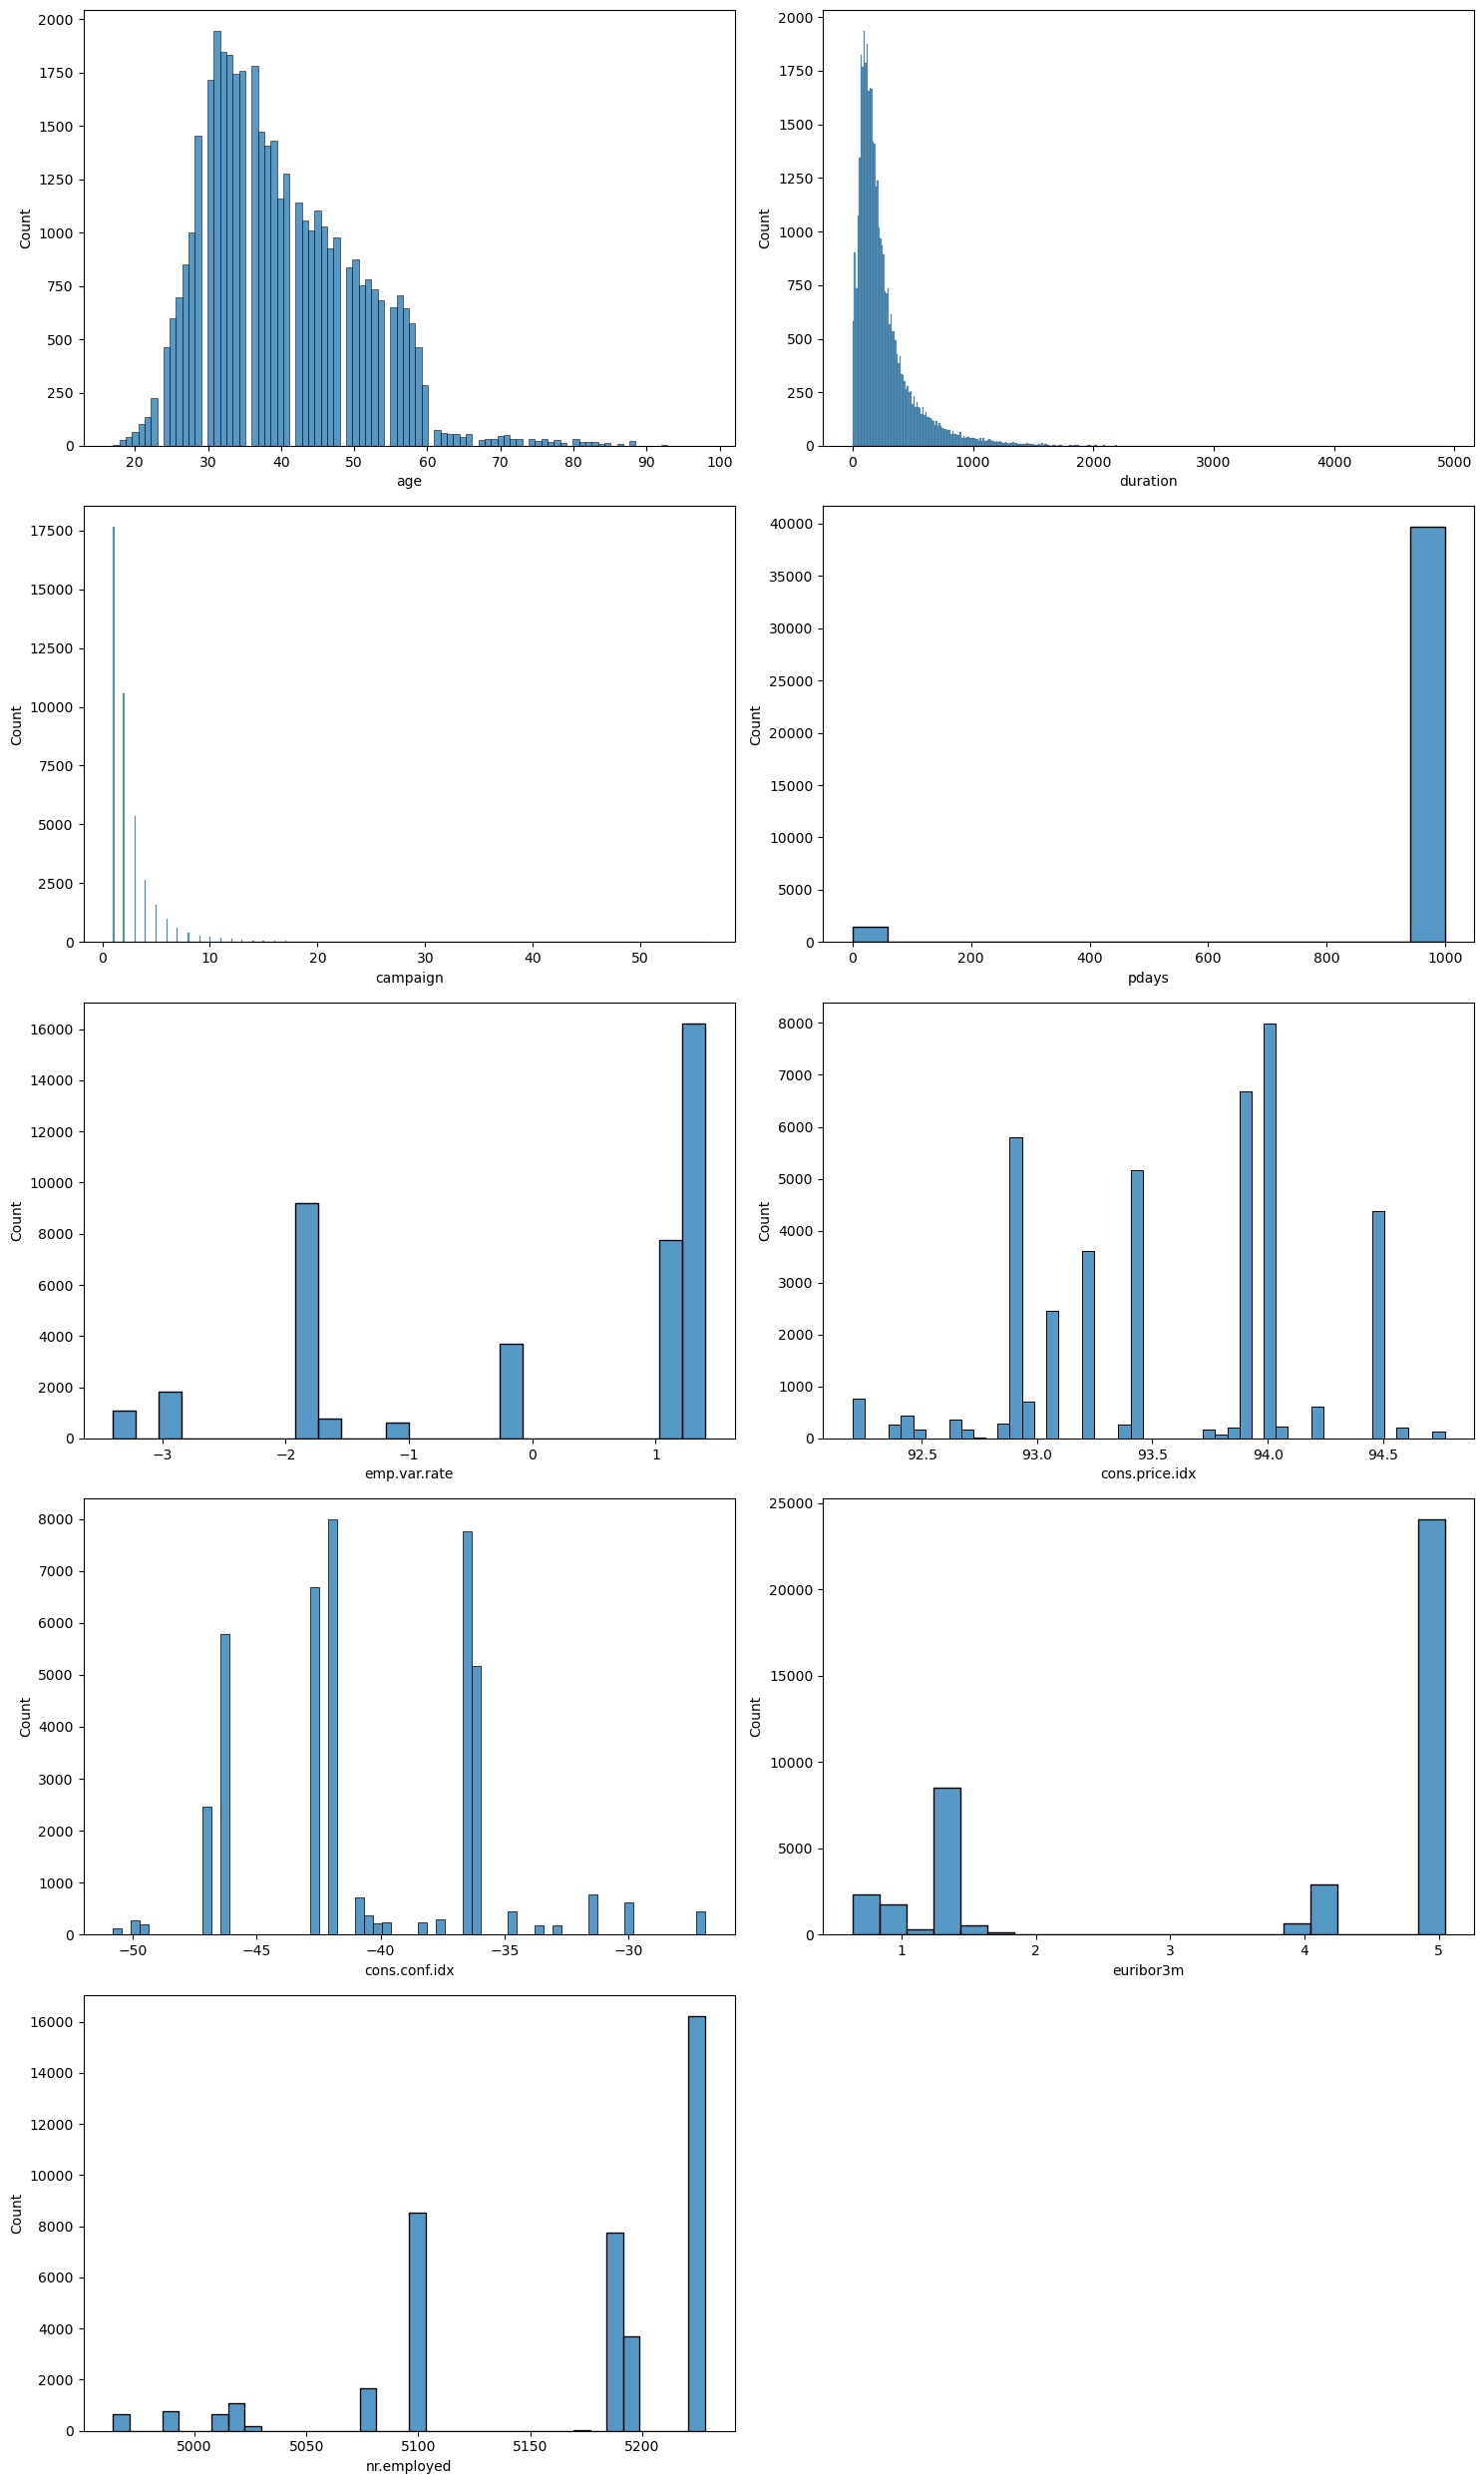

In [19]:
num_features = len(numerical_features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)
# Create a grid of subplots using Seaborn
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, num_feature in enumerate(numerical_features):
    row, col = divmod(i, num_cols)
    sns.histplot(data=df, x= num_feature, ax=axes[row, col])
    
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

Not much to see from above visualizations. Age is expectedly normally distributed whereas rest of the features are skewed.

Plotting Box Plots/strip plots to understand how the numerical features are governing the decision

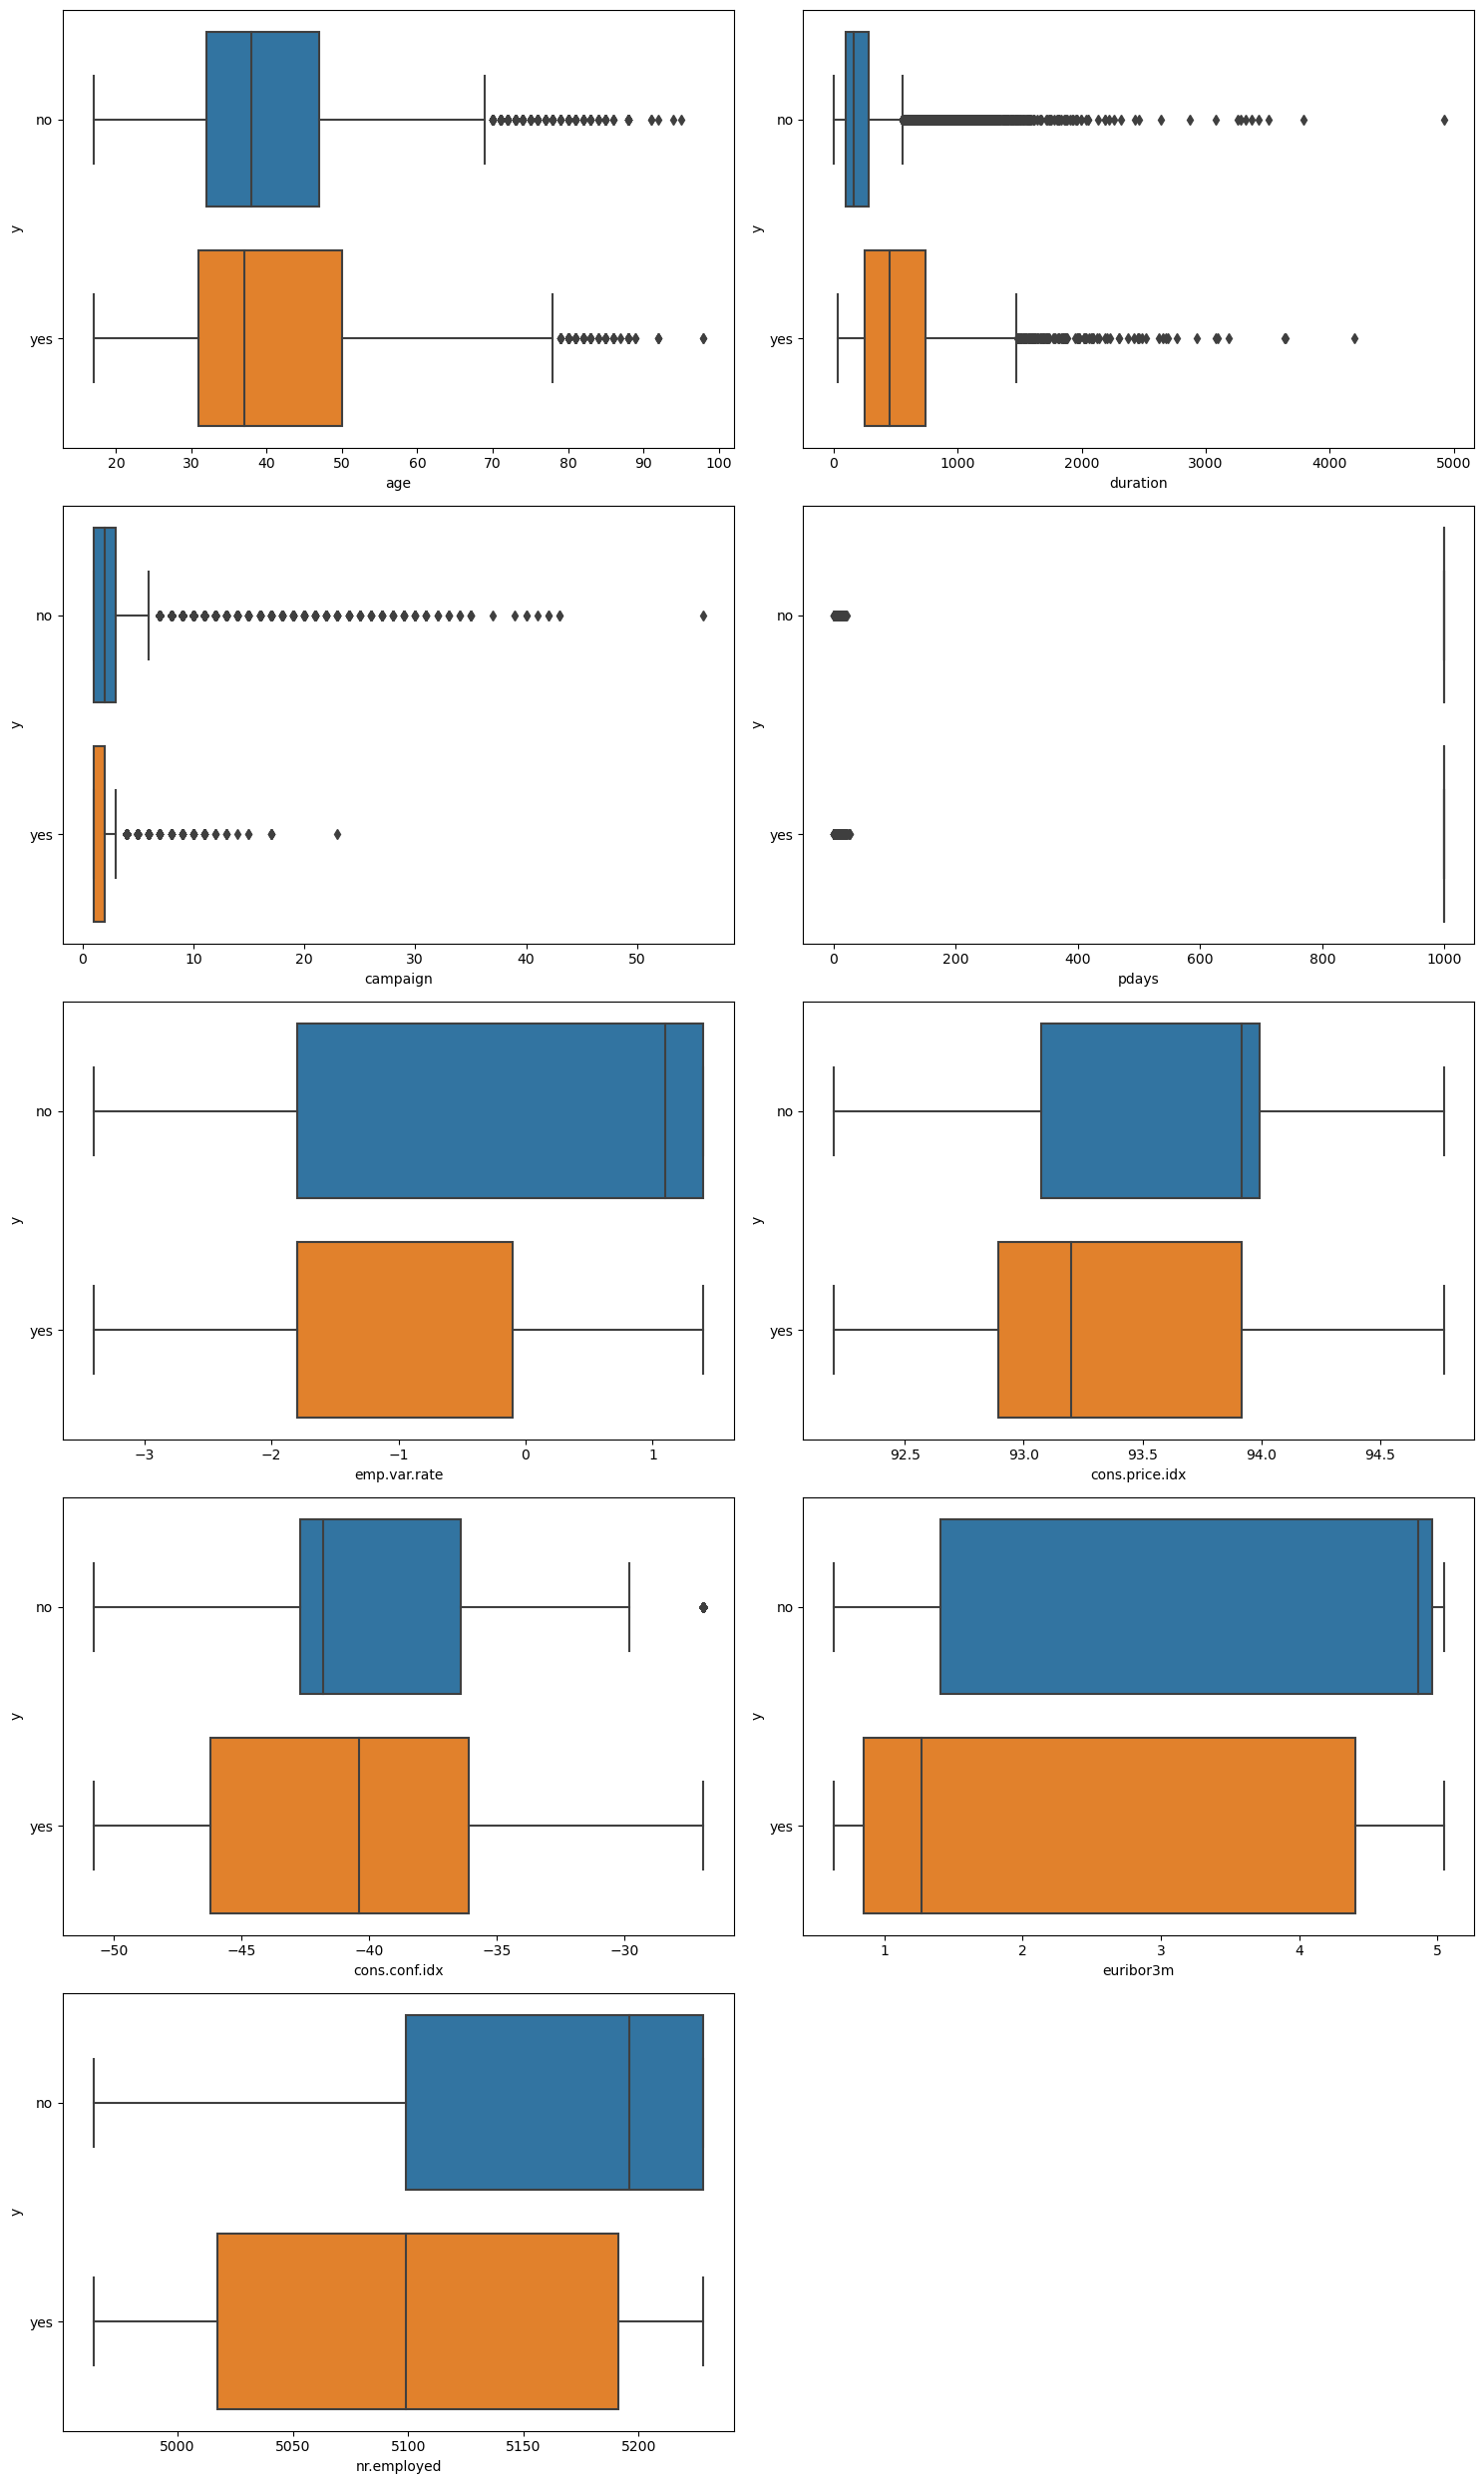

In [20]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, num_feature in enumerate(numerical_features):
    row, col = divmod(i, num_cols)
    sns.boxplot(data=df, y = "y", x= num_feature, ax=axes[row, col], orient= "h")
    
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

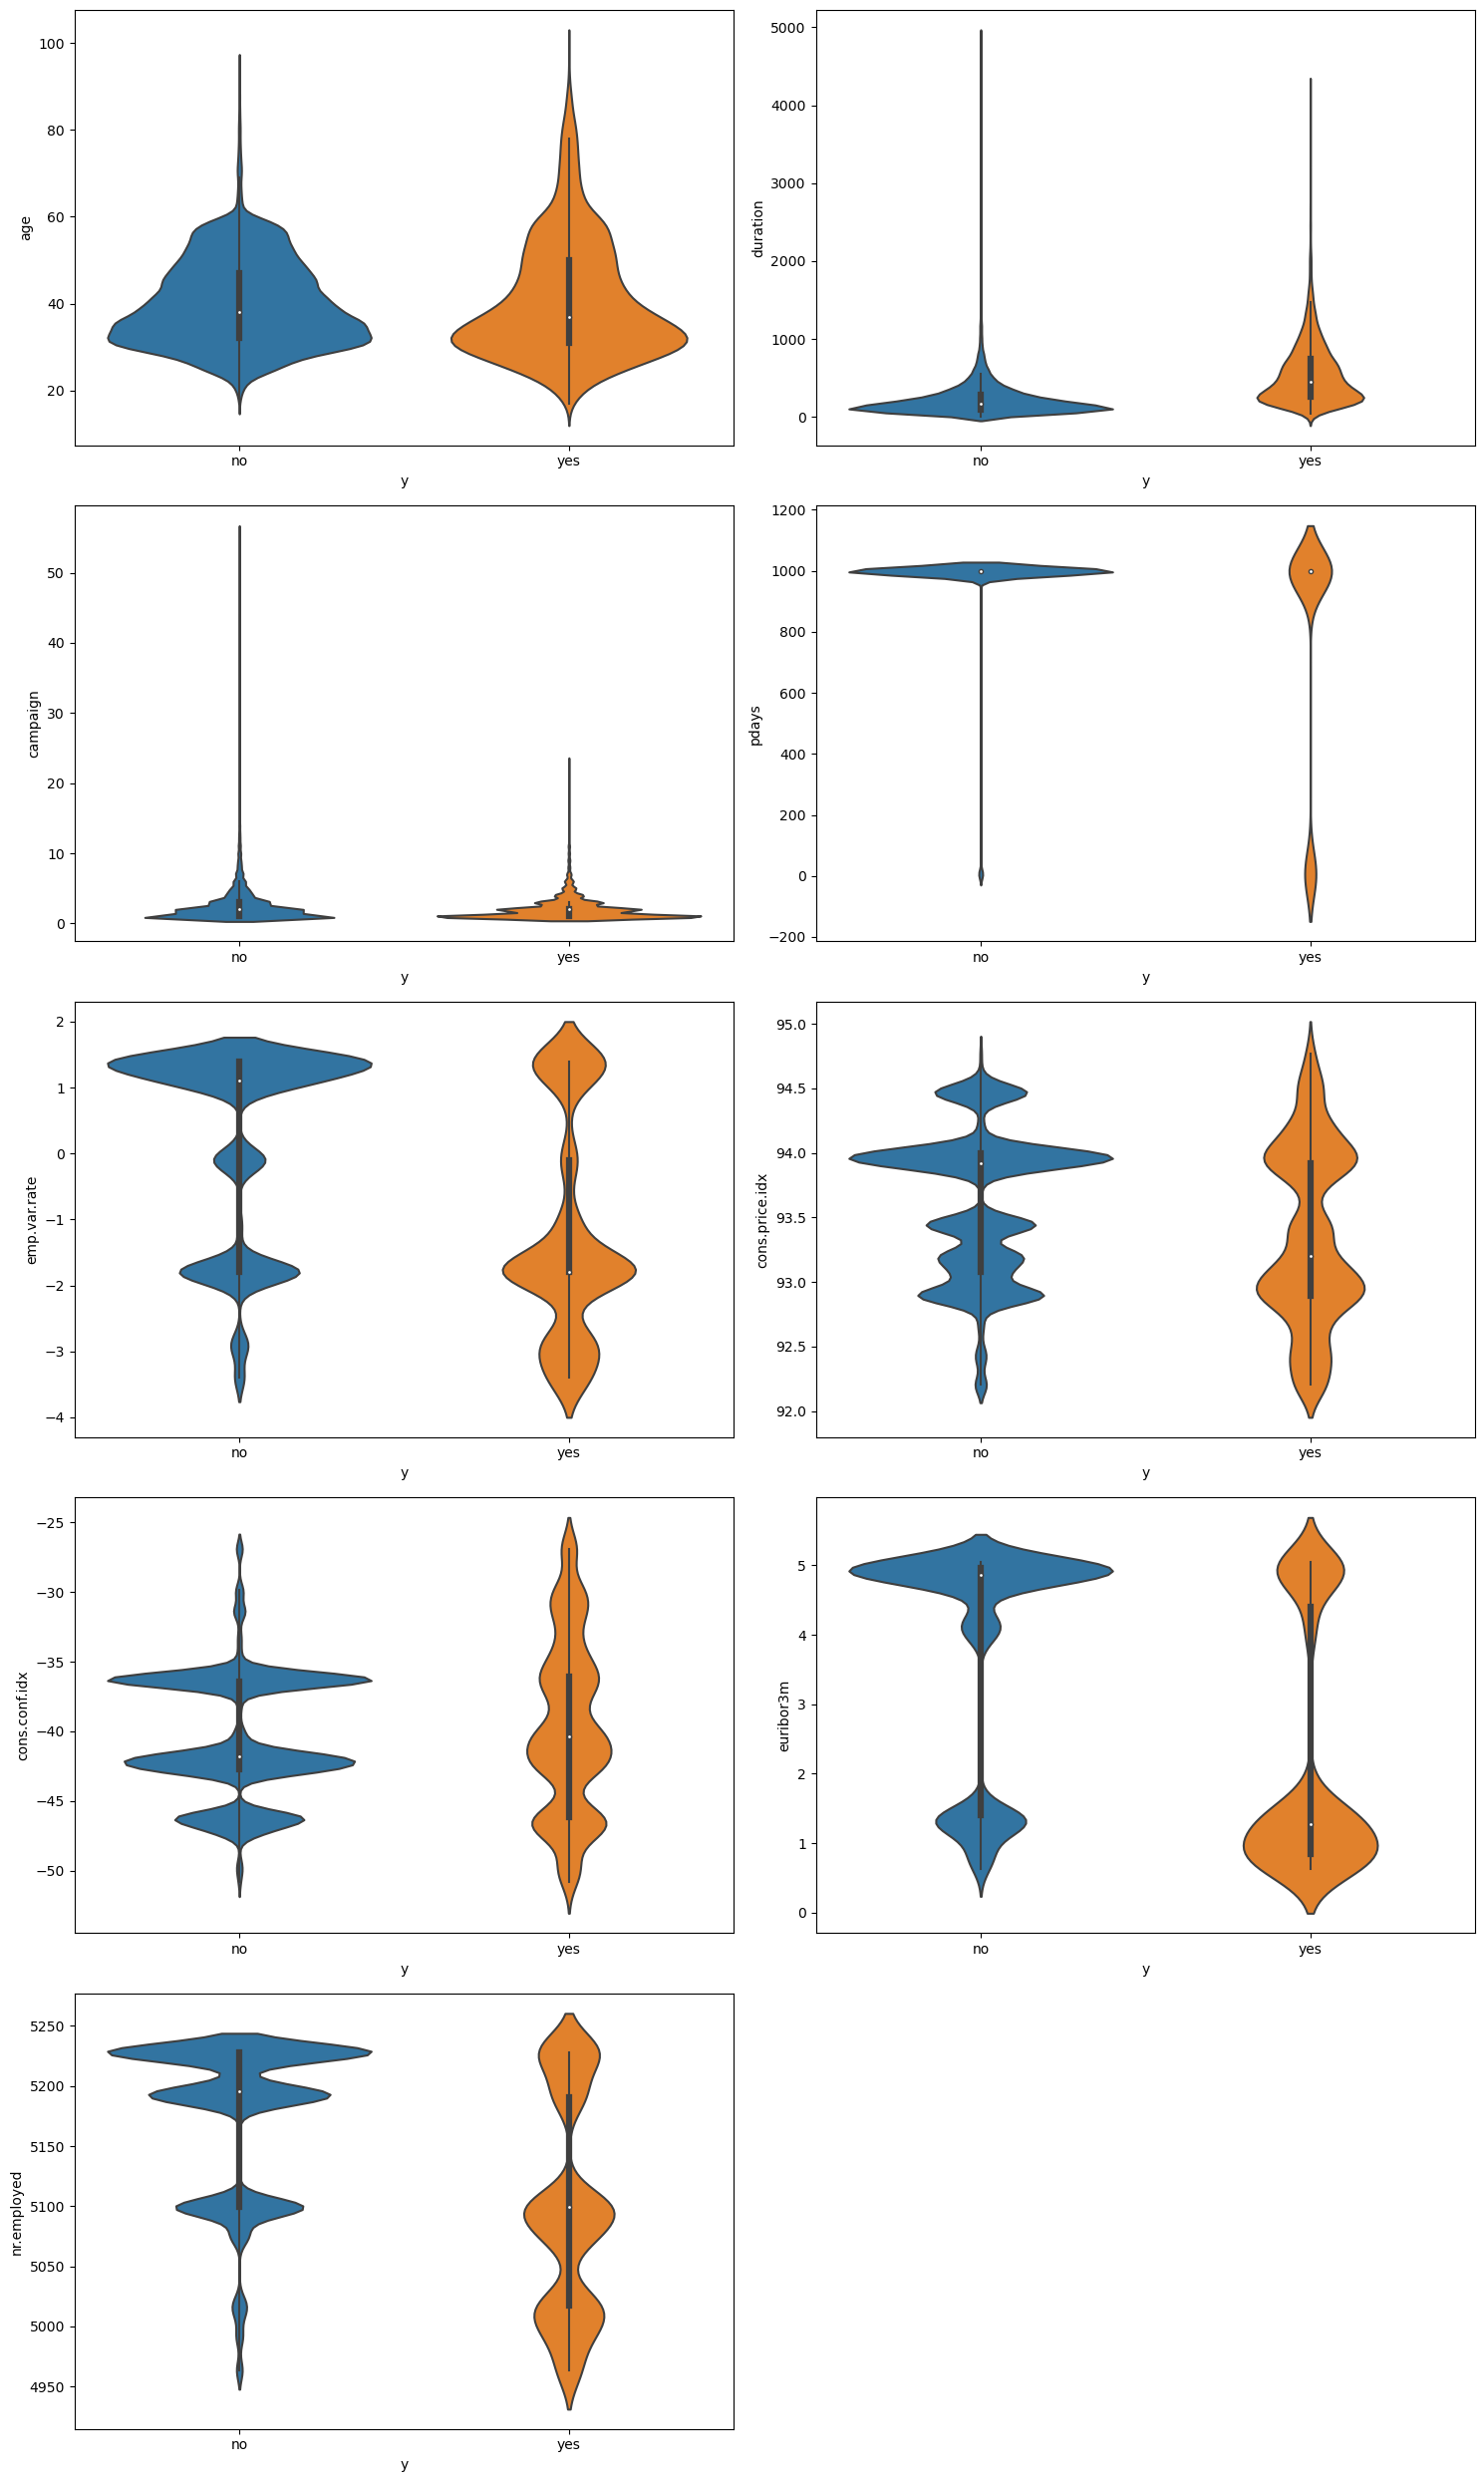

In [21]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, num_feature in enumerate(numerical_features):
    row, col = divmod(i, num_cols)
    sns.violinplot(data=df, x = "y", y= num_feature, ax=axes[row, col])
    
for i in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
    
plt.tight_layout()
plt.show()

Insights: The following are the insights taken from the numerical data
1. It is noticed that the more the number of times the customer is approached for the camapaign; the more unlikely he is to invest in the deposit. It implies that repeated efforts to convince the customer about the campaign has not yielded positive result.
2. Customers in their 20s and late 60s-70s are more likely to subscribe to the term deposit. This is also in conformity with our finding that students and retired professionals have shown more interest than other professions. However it must also be noted that most of our data has age between 30 to 50, so the sample space may have an impact on these findings. 
3. The more the duration of the call, the more the customer is likely to sign up. But this cannot be used as a feature as duration of the call cannot be determined beforehand

Plotting the correlations between the numerical.

In [22]:
df.corr()

C:\Users\Atfan\AppData\Local\Temp\ipykernel_23024\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000815,0.004468,-0.034381,0.024384,-0.000395,0.000870,0.129366,0.010745,-0.017755
duration,-0.000815,1.000000,-0.071633,-0.047560,0.020608,-0.027993,0.005275,-0.008194,-0.032926,-0.044724
campaign,0.004468,-0.071633,1.000000,0.052574,-0.079122,0.150711,0.127855,-0.013809,0.135091,0.144052
pdays,-0.034381,-0.047560,0.052574,1.000000,-0.587512,0.271022,0.078899,-0.091344,0.296921,0.372620
previous,0.024384,0.020608,-0.079122,-0.587512,1.000000,-0.420520,-0.203151,-0.050947,-0.454530,-0.501358
emp.var.rate,-0.000395,-0.027993,0.150711,0.271022,-0.420520,1.000000,0.775331,0.195953,0.972242,0.906965
cons.price.idx,0.000870,0.005275,0.127855,0.078899,-0.203151,0.775331,1.000000,0.058916,0.688217,0.522020
cons.conf.idx,0.129366,-0.008194,-0.013809,-0.091344,-0.050947,0.195953,0.058916,1.000000,0.277603,0.100436
euribor3m,0.010745,-0.032926,0.135091,0.296921,-0.454530,0.972242,0.688217,0.277603,1.000000,0.945155
nr.employed,-0.017755,-0.044724,0.144052,0.372620,-0.501358,0.906965,0.522020,0.100436,0.945155,1.000000


<Axes: >

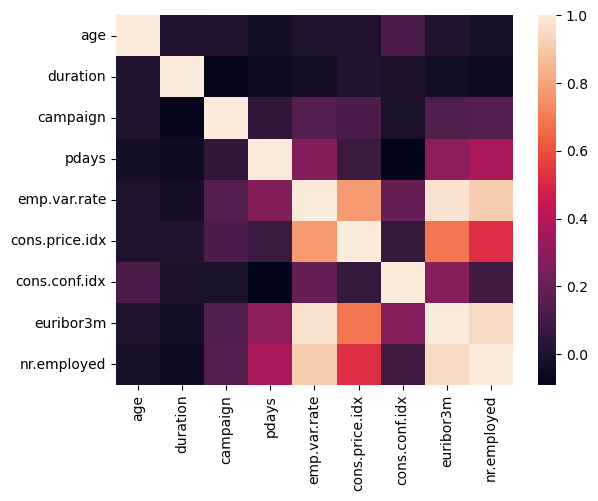

In [23]:
sns.heatmap(df[numerical_features].corr(method = "pearson"))

We see that the Social and Economic Context attributes emp.var.rate, cons.price.idx, euribor3m, nr.employed are having very high correlations among each other (>0.4). Thus we perform factor analysis to form a single feature and drop the existing features

In [24]:
fac_2c = FactorAnalysis(n_components= 1)
df["soc_eco_factor"] = fac_2c.fit_transform(df[["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]])
df = df.drop(["emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"], axis = 1)

C:\Users\Atfan\anaconda3\Lib\site-packages\sklearn\decomposition\_factor_analysis.py:297: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,y,soc_eco_factor
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,-36.4,no,-0.709924
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,-36.4,no,-0.709924
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,-36.4,no,-0.709924
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,-36.4,no,-0.709924
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,-36.4,no,-0.709924


Pairplots

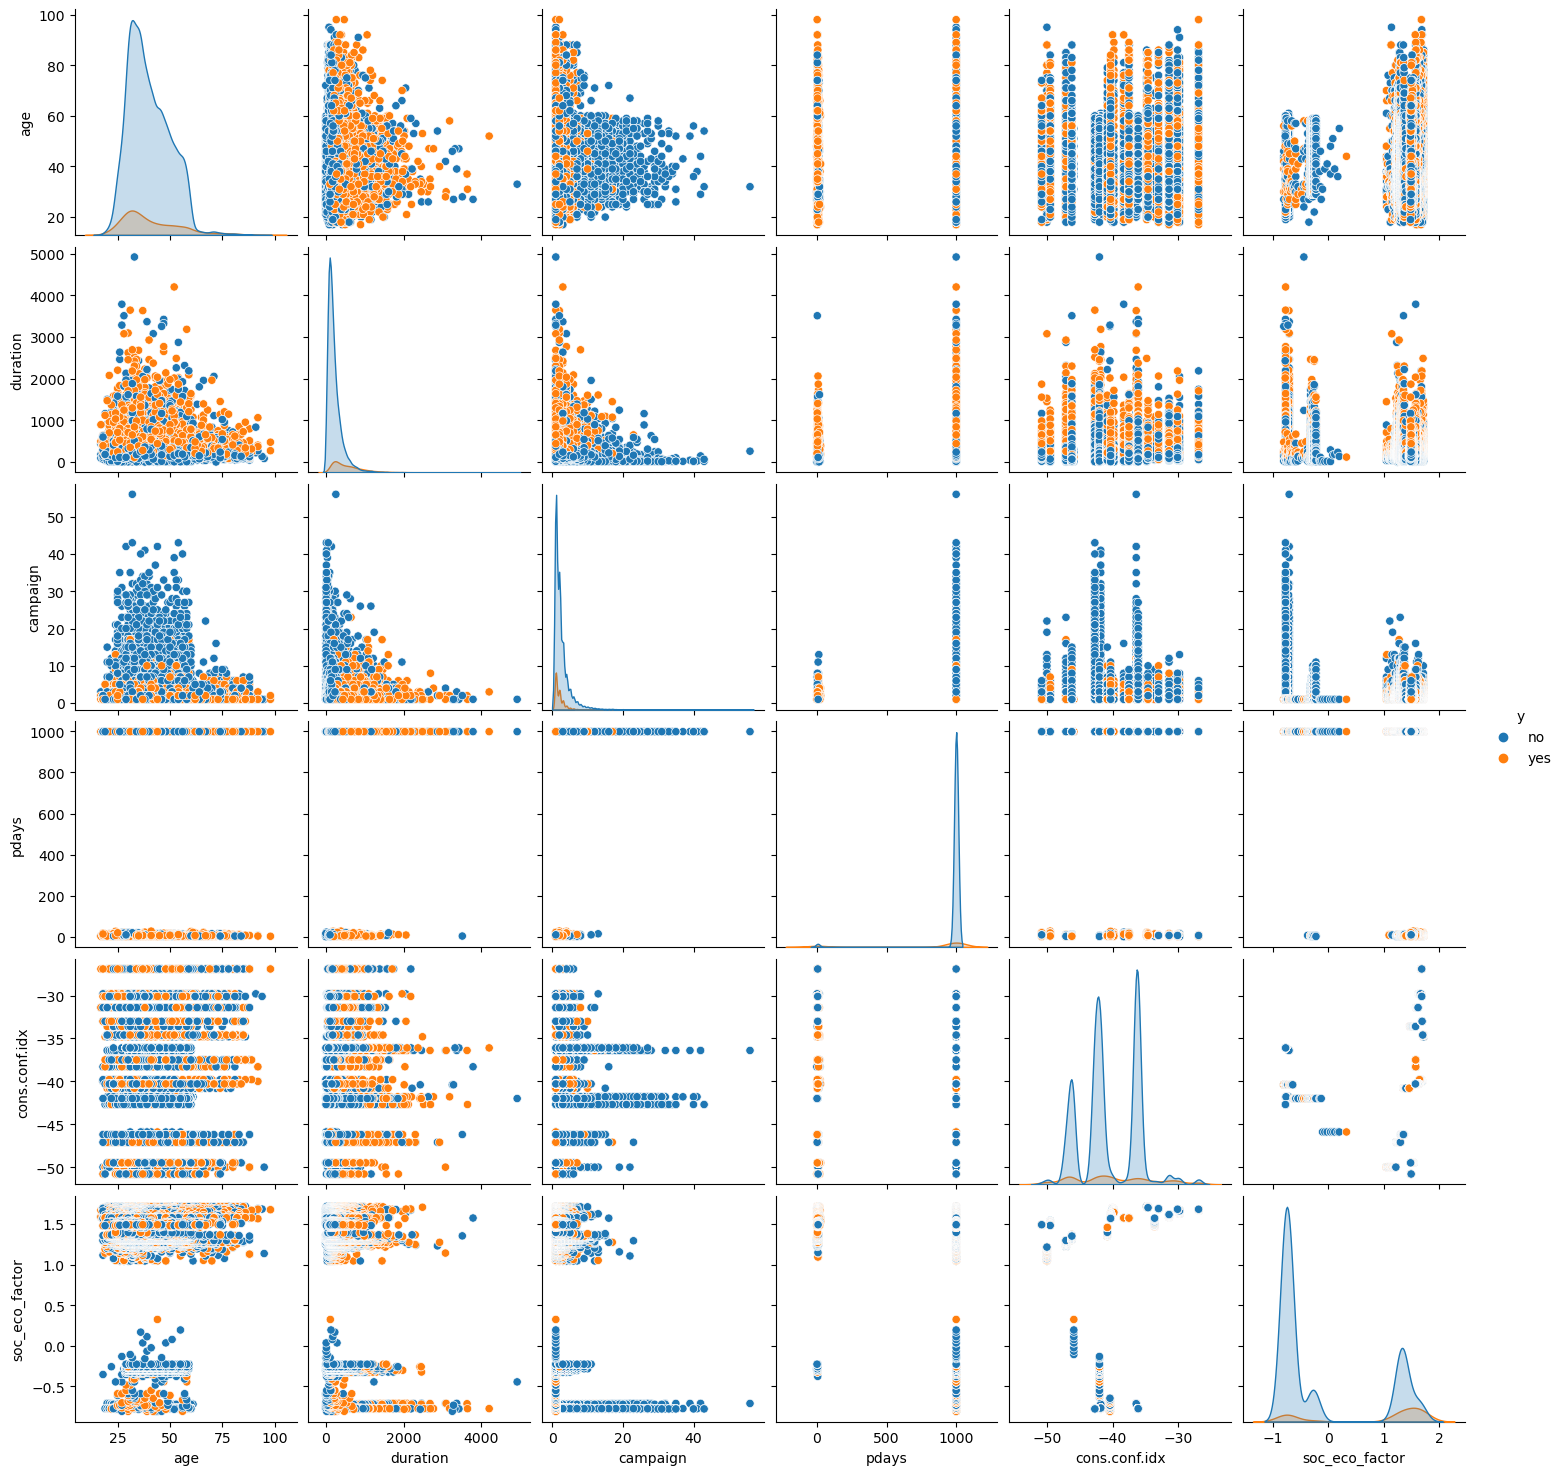

In [26]:
numerical_features_2 = ["age", "duration", "campaign", "pdays", "cons.conf.idx", "soc_eco_factor", "y"]
sns.pairplot(df[numerical_features_2], hue = "y")

Dropping Duration Column as it cannot be used for modelling

In [27]:
df = df.drop(["duration"], axis = 1)

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y,soc_eco_factor
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no,-0.709924
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no,-0.709924
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no,-0.709924
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,-36.4,no,-0.709924
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,-36.4,no,-0.709924


Now that we have completed Exploratory Data Analysis, we move onto the Feature Engineering Process

FEATURE ENGINEERING

1. CONVERTING CATEGORICAL DATA TO NUMERICAL DATA                         
    As all our categorical variables have less than 5 distinct/unique values, we will incorporate one hot encoding.

In [29]:
ohe_columns = df.drop("y", axis = 1).select_dtypes(include = "object").columns


In [30]:
df = pd.concat([df, pd.get_dummies(df[ohe_columns])], axis = 1)
df = df.drop(ohe_columns, axis = 1)

In [31]:
df.head()

,age,campaign,pdays,previous,cons.conf.idx,y,soc_eco_factor,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,-36.4,no,-0.709924,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,-36.4,no,-0.709924,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,-36.4,no,-0.709924,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,-36.4,no,-0.709924,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,-36.4,no,-0.709924,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
df.shape

(41184, 60)

We have hot 60 columns after One Hot Encoding, which is considerable considering that we have more than 40k data points

2. Handling null values                         
We have already checked that there were no null values. Also, the unknown values that we had has already been dealt above. They will now act as an independent feature after One Hot Encoding

3. Data Normalization
Data Normalization is done so that ML models weight all the features equally. The goal of normalization is to change the values of numeric columns in the data set to use a common scale, without distorting differences in the ranges of values or losing information. We used MinMaxScaler function.

In [89]:
X = df.drop(["y"], axis = 1)
y = df["y"]
y = np.where(y == "no", 0, 1)
min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(X)

4. Splitting the data into test and train datasets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = 0.2, random_state = 0)

RANDOM FOREST MODEL

The average accuracy is 89.3951 %
Accuracy for each fold [0.89150228 0.89559939 0.89376233 0.89512824 0.89376233]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7315
           1       0.56      0.29      0.38       922

    accuracy                           0.90      8237
   macro avg       0.74      0.63      0.66      8237
weighted avg       0.88      0.90      0.88      8237

Confusion Matrix


<Axes: >

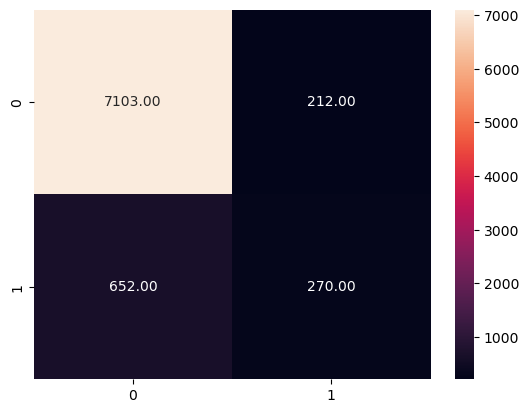

In [92]:
RFC = RandomForestClassifier(random_state= 0)
cv = cross_val_score(RFC, X_train, y_train, cv = 5, scoring = "accuracy")
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))
print("Classification Report")
print(classification_report(y_test, y_pred_RFC))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt ='.2f')

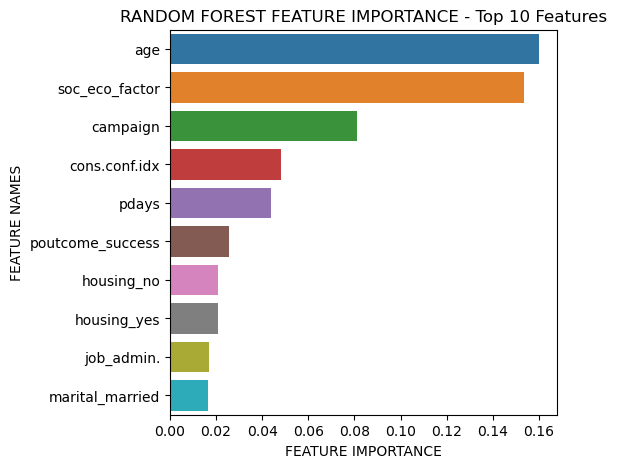

In [93]:

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    top_n = 10
    top_fi_df = fi_df[:top_n]

    # Define size of bar plot
    plt.figure(figsize=(5, 5))

    # Plot Seaborn bar chart
    sns.barplot(x=top_fi_df['feature_importance'], y=top_fi_df['feature_names'])

    # Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE - Top ' + str(top_n) + ' Features')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Assuming RFC and X are defined elsewhere in your code
plot_feature_importance(RFC.feature_importances_, X.columns, 'RANDOM FOREST')
plt.show()


Hyper parameter Tuning

In [ ]:
param_grid = {
             'n_estimators': [5, 10, 15, 20,100,200],
             'max_samples' : [0.8, 0.9, 1],
             'bootstrap' : [True, False],
             'criterion' : ['gini', 'entropy'],
             'min_samples_split': [0.1, 0.2, 0.3]
             }
clf_rfc = GridSearchCV(estimator= RFC ,param_grid= param_grid,verbose = True, cv= 5, n_jobs = -1)
best_clf_rfc = clf_rfc.fit(X_train, y_train)


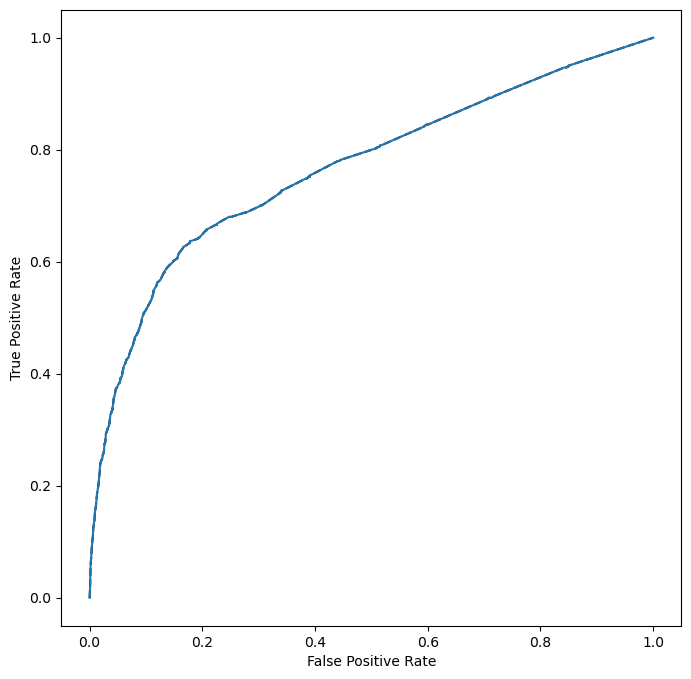

In [100]:
y_pred_proba = RFC.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr,tpr,'k--')
ax.plot(fpr,tpr, label='Random Forest Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.show()